In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
from pyunicorn.timeseries import RecurrencePlot
import iberoSignalPro.preprocesa as ib
import ntwktools as nt

import logging
logging.basicConfig(level=logging.CRITICAL)

In [22]:
FILE_NAME = r"C:\Users\fercy\OneDrive\Escritorio\InternadoFMM\Pruebas%20BCI\SeñalesProcesadas10Hz2\MauricioServin\S2\10deTorquePre.csv"


(3456,)


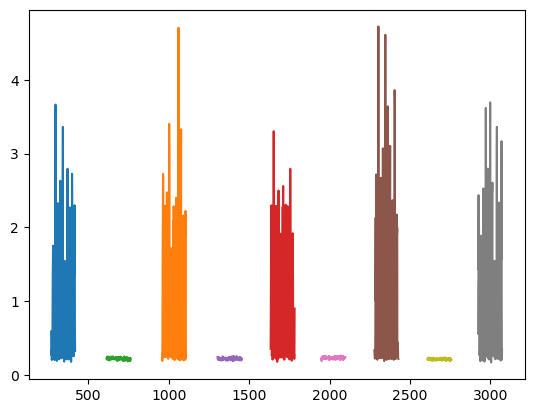

In [23]:
df = pd.read_csv(FILE_NAME)
act, rep = nt.obtener_win(df.EnvAnta, df.Binaria, siPlot = False)
act, rep = nt.selecciona_ventanas(act, rep, siPlot = True, signal = df.EnvAnta, win_len=15)

In [24]:
alfa = df.iloc[:, 7::4]
mu = df.iloc[:, 8::4]
beta = df.iloc[:, 9::4]
gamma = df.iloc[:, 10::4]


In [25]:
fs = 10
canal = 3

def get_fft(fs = 0, canal = 3, act = [], rep = [], band = []):
    mean_fft_act = []
    mean_fft_rep = []
    freqs = []

    for i in range(min(len(act), len(rep))):
        actividad = band.iloc[act[i][0]:act[i][1], canal].values
        reposo = band.iloc[rep[i][0]:rep[i][1], canal].values
        fft_act = np.abs(np.fft.fft(actividad))
        fft_rep = np.abs(np.fft.fft(reposo))
        freqs_act = np.fft.fftfreq(len(actividad), d=1/fs)
        freqs_rep = np.fft.fftfreq(len(reposo), d=1/fs)
        half_act = freqs_act > 0
        half_rep = freqs_rep > 0
        mean_fft_act.append(fft_act)
        mean_fft_rep.append(fft_rep)
        freqs.append(freqs_act)

    mean_fft_act = np.array(mean_fft_act)
    mean_fft_rep = np.array(mean_fft_rep)

    return (freqs[-1][half_rep], mean_fft_act.mean(axis = 0)[half_rep],  mean_fft_rep.mean(axis = 0)[half_rep])

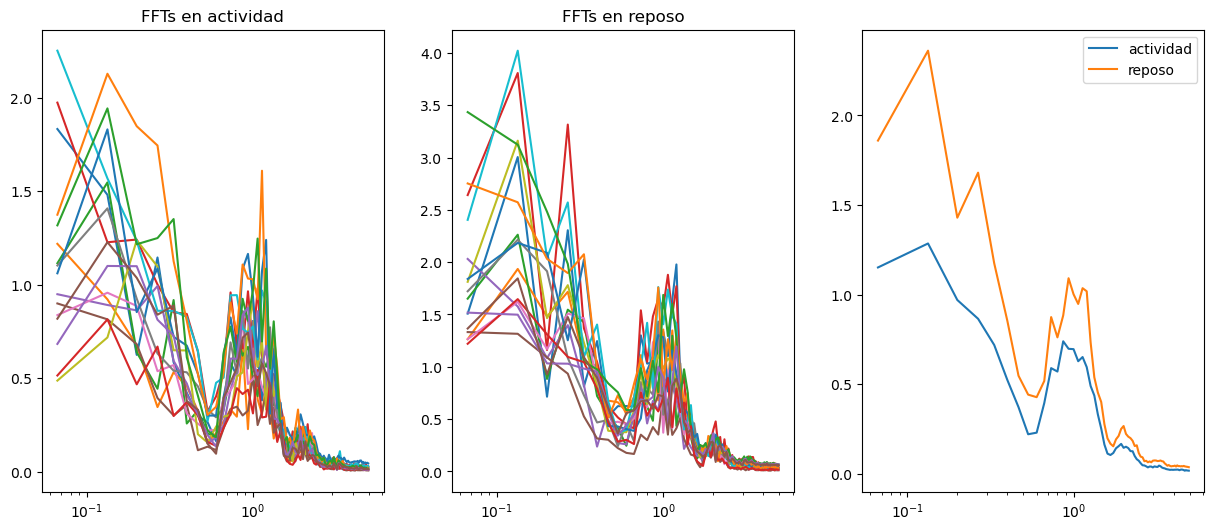

In [26]:
plt.figure(figsize=(15, 6))

fft_act_mean = []
fft_rep_mean = []
for i in range(len(mu.columns)):
    freq, fft_act, fft_rep = get_fft(10, i, act, rep, band = mu)
    fft_act_mean.append(fft_act)
    fft_rep_mean.append(fft_rep)
    plt.subplot(1, 3, 1)
    plt.semilogx(freq, fft_act)
    plt.subplot(1, 3, 2)
    plt.semilogx(freq, fft_rep)

plt.subplot(1, 3, 1)
plt.title("FFTs en actividad")

plt.subplot(1, 3, 2)
plt.title("FFTs en reposo")


fft_act_mean = np.array(fft_act_mean)
fft_rep_mean = np.array (fft_rep_mean)
plt.subplot(1, 3, 3)
plt.semilogx(freq, fft_act_mean.mean(axis = 0), label = "actividad")
plt.semilogx(freq, fft_rep_mean.mean(axis = 0), label = "reposo")
plt.legend()

freq_og = freq
    

In [27]:
def get_fft_mean_mean(act, rep, band):
    fft_act_mean = []
    fft_rep_mean = []
    for i in range(len(band.columns)):
        freq, fft_act, fft_rep = get_fft(10, i, act, rep, band = band)
        fft_act_mean.append(fft_act)
        fft_rep_mean.append(fft_rep)
        

    fft_act_mean = np.array(fft_act_mean)
    fft_rep_mean = np.array (fft_rep_mean)
    
    return freq, fft_act_mean.mean(axis = 0), fft_rep_mean.mean(axis = 0)

In [28]:

def read_csvs(folder_path, carga = 10, band = "mu"):
    
    files = os.listdir(folder_path)
    csv_files = [file for file in files if file.endswith('.csv')]
    if not csv_files:
        print("No se encontraron archivos csv")
        return None, None, None
    
    
    for csv_file in csv_files:
        
        file_path = os.path.join(folder_path, csv_file)

        if carga == 10:
            target_csv = "10deTorquePre.csv"
            #print("10%")
            
        elif carga == 5:
            target_csv = "5deTorquePre.csv"
            #print("5%")
            
        elif carga == 0:
            target_csv = "pasivoPre.csv"
            #print("Pasivo")

        if csv_file == target_csv:
            try:
                df = pd.read_csv(file_path)
                act, rep = nt.obtener_win(df.EnvAnta, df.Binaria, siPlot = False)
                act, rep = nt.selecciona_ventanas(act, rep, siPlot = True, signal = df.EnvAnta, win_len=15)
                if band == "mu":
                    slct_band = df.iloc[:, 8::4]
                elif band == "beta":
                    slct_band = df.iloc[:, 9::4]
                else:
                    slct_band = df.iloc[:, 10::4]
                freq, t_fft_act, t_fft_rep = get_fft_mean_mean(act, rep, band = slct_band)
                
            except Exception as e:
                print("Error en 10")
                
    return freq, t_fft_act, t_fft_rep


(2810,)
(2464,)
(4248,)
(2910,)
(3475,)
(3437,)
(3972,)
(4064,)
(3355,)
(3489,)
(4194,)
(3809,)
(3480,)
(3169,)
(3829,)
(3751,)
(3039,)
(3259,)
(3653,)
(3231,)
(3505,)
(3333,)
(3078,)
(3402,)
(4364,)
(2615,)
(3100,)
(4041,)
(3600,)
(3566,)
(4693,)
(2606,)
(3456,)
(2406,)
(2649,)
(2377,)
(3869,)
(3876,)
(3686,)
(3333,)
(2492,)
(3006,)
(3647,)
(3036,)
No se encontraron archivos csv


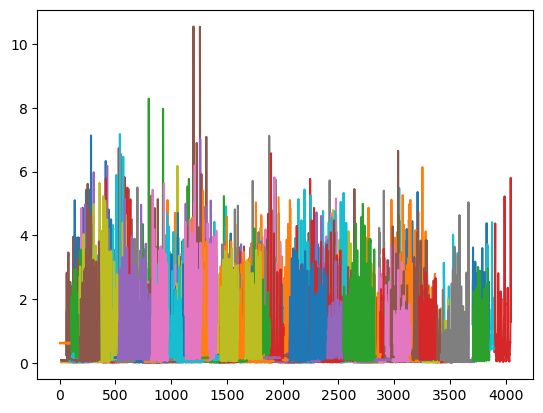

In [29]:
fft_act = []
fft_rep = []

band_name = "mu"
carga = 10

root_folder_path = r"C:\Users\fercy\OneDrive\Escritorio\InternadoFMM\Pruebas%20BCI\SeñalesProcesadas10Hz2"

sub_sub_folders = []

items_in_root = os.listdir(root_folder_path)

sub_folders = [item for item in items_in_root if os.path.isdir(os.path.join(root_folder_path, item))]
for sub_folder in sub_folders:
    sub_folder_path = os.path.join(root_folder_path, sub_folder)
    items_in_sub_folder = os.listdir(sub_folder_path)
    for item in items_in_sub_folder:
        item_path = os.path.join(sub_folder_path, item)
        if os.path.isdir(item_path):
            #print(item_path)
            sub_sub_folders.append(item_path)
            try:
                #print(f"Reading {item_path}")
                
                freq, t_fft_act, t_fft_rep = read_csvs(item_path, carga, band=band_name)

                fft_act.append(t_fft_act)
                fft_rep.append(t_fft_rep)
                
                pass 
            except Exception as e:
                error_message = f"******************************** Error {e} en {item_path}\n"
                print(error_message)

fft_act = np.array(fft_act[:-1])
fft_rep = np.array(fft_rep[:-1])

In [30]:
fft_act.shape, fft_rep.shape

((44, 74), (44, 74))

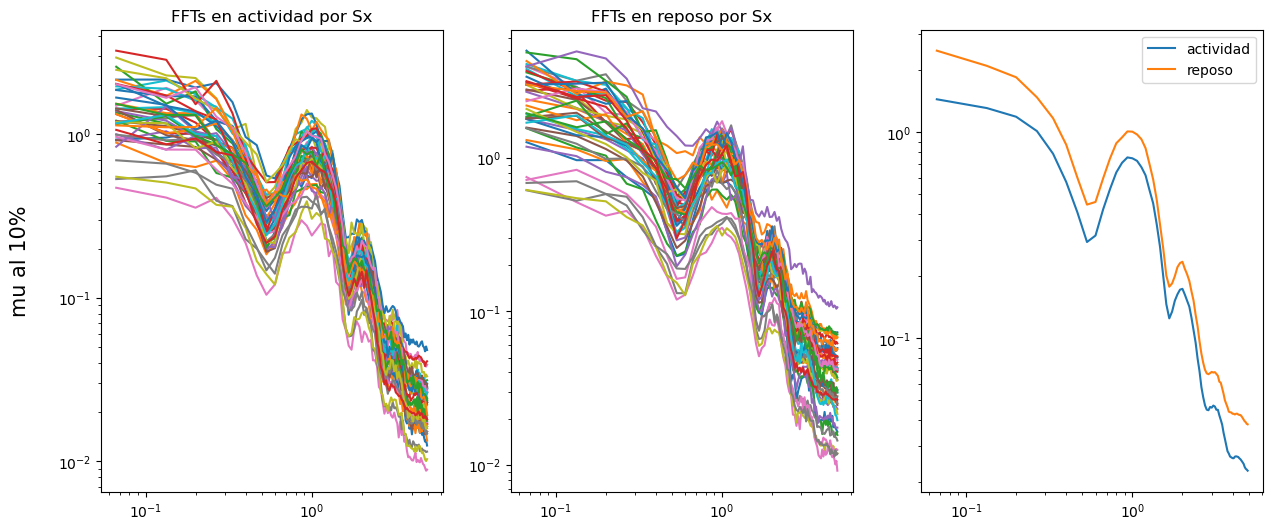

In [31]:
plt.figure(figsize=(15, 6))

for i in range(len(fft_act)):

    plt.subplot(1, 3, 1)
    plt.loglog(freq_og, fft_act[i])
    plt.subplot(1, 3, 2)
    plt.loglog(freq_og, fft_rep[i])

plt.subplot(1, 3, 1)
plt.title("FFTs en actividad por Sx")
plt.ylabel(f"{band_name} al {carga}%", fontsize = 15, labelpad=20)

plt.subplot(1, 3, 2)
plt.title("FFTs en reposo por Sx")


plt.subplot(1, 3, 3)
plt.loglog(freq_og, np.nanmean(fft_act, axis = 0), label = "actividad")
plt.loglog(freq_og, np.nanmean(fft_rep, axis = 0), label = "reposo")
plt.legend()

    